In [401]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint



### Read data

In [402]:
# Loda data
target = pd.read_csv('../data/processed/properties.csv')
features = pd.read_csv('../data/processed/features.csv')

# Merge data
df = pd.merge(target, features, on='Period')

In [403]:
df

,Period,num_nodes,num_edges,density,clustering,assortativity,shortest_path,TPU,GPR,DMGSRMRCHSACD,IPTOTSAKD,IMPCOV,NEER,REER,RETSALESSA,TOTRESV,UNEMPSA_,GEPU
0,2010-01-01,168,1828,0.130311,0.712998,-0.444260,2.078985,24.490808,91.581024,1.802235e+06,1.279704e+12,4.880311,99.710300,99.882075,100.970001,8.795469e+06,8.266556,113.055131
1,2010-02-01,172,1838,0.124983,0.760005,-0.468762,2.061200,18.847337,80.725357,1.853262e+06,1.283712e+12,4.751241,100.058497,100.144656,101.121526,8.805293e+06,8.206897,111.376776
2,2010-03-01,171,1923,0.132301,0.776834,-0.466797,2.032542,28.556673,74.116943,1.819304e+06,1.300778e+12,4.882158,99.910024,99.868581,102.100177,8.882128e+06,8.188579,107.563775
3,2010-04-01,170,1850,0.128785,0.713454,-0.467922,2.069474,25.487728,88.761581,1.811889e+06,1.309634e+12,4.978065,99.826979,99.736114,95.659314,9.019701e+06,8.210219,103.827844
4,2010-05-01,167,1876,0.135344,0.773232,-0.462863,2.023086,21.410693,88.958710,1.774453e+06,1.319176e+12,5.057788,100.486460,100.390645,96.108964,8.974806e+06,8.116854,146.925561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2023-04-01,176,2060,0.133766,0.755452,-0.476133,2.014156,33.893310,106.823509,3.117671e+06,1.840107e+12,4.309468,102.766349,103.775683,100.777886,1.343550e+07,5.721342,231.680113
160,2023-05-01,179,2172,0.136338,0.756473,-0.486812,2.003955,59.655938,108.474258,3.164372e+06,1.856585e+12,4.209162,103.032657,104.165334,101.169556,1.331935e+07,5.713445,228.345425
161,2023-06-01,180,2127,0.132030,0.768839,-0.487065,2.027871,52.330449,110.569519,3.153351e+06,1.863575e+12,4.238883,103.040627,104.065629,101.075762,1.336669e+07,5.634794,229.720572
162,2023-07-01,175,2021,0.132742,0.725456,-0.482282,2.023580,63.295541,107.261742,3.056382e+06,1.859773e+12,4.398190,102.602525,103.401672,100.887063,1.344255e+07,5.686503,226.331378


In [404]:
# Exclude 'Period'
numerical_columns = df.columns.difference(['Period'])  # Exclude 'Period'

# Create a StandardScaler
scaler = StandardScaler()  

# Standardize the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Use the interpolate method to fill missing values with interpolation
df = df.interpolate()

# Sort the DataFrame by the 'period' column
df = df.sort_values(by='Period')


In [405]:
df.head()

,Period,num_nodes,num_edges,density,clustering,assortativity,shortest_path,TPU,GPR,DMGSRMRCHSACD,IPTOTSAKD,IMPCOV,NEER,REER,RETSALESSA,TOTRESV,UNEMPSA_,GEPU
0,2010-01-01,-1.907728,-2.123956,-0.662045,-1.736416,0.897781,1.708130,-0.704058,-0.197764,-1.734612,-1.962292,-0.116903,-0.682534,-0.874579,0.406478,-2.744138,1.333355,-1.032877
1,2010-02-01,-0.812829,-2.025574,-1.541808,0.673488,-0.766521,0.961073,-0.811993,-0.573908,-1.603232,-1.937374,-0.421366,-0.457849,-0.730151,0.432561,-2.735926,1.253469,-1.056117
2,2010-03-01,-1.086554,-1.189334,-0.333355,1.536279,-0.633031,-0.242651,-0.626296,-0.802887,-1.690665,-1.831265,-0.112547,-0.553656,-0.882001,0.601025,-2.671689,1.228940,-1.108914
3,2010-04-01,-1.360279,-1.907517,-0.913957,-1.713061,-0.709437,1.308652,-0.684992,-0.295457,-1.709756,-1.776203,0.113687,-0.607243,-0.954863,-0.507697,-2.556674,1.257918,-1.160644
4,2010-05-01,-2.181453,-1.651725,0.169031,1.351597,-0.365774,-0.639831,-0.762968,-0.288626,-1.806146,-1.716878,0.301746,-0.181691,-0.594848,-0.430295,-2.594208,1.132896,-0.563886


### Uncertainty measurement

In [406]:
import pandas as pd

# Get the actual names of the target columns
# target_columns = ['num_nodes', 'num_edges', 'density', 'clustering', 'assortativity', 'shortest_path'] # clustering and shortest_path doesn't correlate wtih features
target_columns = ['num_nodes', 'num_edges', 'density', 'assortativity']

# Copy the original DataFrame to avoid modifying the original data
lag1_df = df.copy()
lag3_df = df.copy()
lag6_df = df.copy()

# Shift target columns by 1, 3, and 6 periods in respective lag DataFrames
for column in target_columns:
    lag1_df[f'{column}'] = lag1_df[column].shift(1)
    lag3_df[f'{column}'] = lag3_df[column].shift(3)
    lag6_df[f'{column}'] = lag6_df[column].shift(6)

# Drop rows with NaN values in lag DataFrames
lag1_df = lag1_df.dropna()
lag3_df = lag3_df.dropna()
lag6_df = lag6_df.dropna()


In [407]:
lag6_df.head()

,Period,num_nodes,num_edges,density,clustering,assortativity,shortest_path,TPU,GPR,DMGSRMRCHSACD,IPTOTSAKD,IMPCOV,NEER,REER,RETSALESSA,TOTRESV,UNEMPSA_,GEPU
6,2010-07-01,-1.907728,-2.123956,-0.662045,-0.393689,0.897781,0.803553,-0.623662,-0.620476,-1.592783,-1.692744,0.124748,-0.196988,-0.571097,-0.017825,-2.360319,1.002800,-0.632830
7,2010-08-01,-0.812829,-2.025574,-1.541808,0.403282,-0.766521,-0.231091,-0.602719,-0.564604,-1.576119,-1.656546,0.121644,-0.302384,-0.643085,-0.026127,-2.335409,0.961246,-0.921952
8,2010-09-01,-1.086554,-1.189334,-0.333355,-0.108983,-0.633031,0.592373,-0.570088,-0.905047,-1.482322,-1.615194,0.300772,-0.461550,-0.782745,0.111750,-2.063058,0.954884,-0.761340
9,2010-10-01,-1.360279,-1.907517,-0.913957,0.767038,-0.709437,0.998204,-0.579318,-1.084414,-1.402714,-1.560728,0.360186,-0.924509,-1.167096,0.844407,-1.891667,0.998790,-0.897328
10,2010-11-01,-2.181453,-1.651725,0.169031,-0.064301,-0.365774,0.669736,-0.589265,-0.089514,-1.244097,-1.506402,-0.115268,-0.892331,-1.124670,0.925140,-1.965691,0.951192,-0.832083


In [408]:
# Function
def perform_random_search_cv(X_train, y_train):
    param_dist = {
        'n_estimators': randint(10, 100),
        'max_depth': [None] + list(np.arange(3, 20)),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    rf_model = RandomForestRegressor()
    tscv = TimeSeriesSplit(n_splits=5)

    random_search = RandomizedSearchCV(
        rf_model, param_distributions=param_dist, n_iter=10, cv=tscv, scoring='neg_mean_squared_error', random_state=42
    )
    random_search.fit(X_train, y_train)

    print("Best Parameters:", random_search.best_params_)
    return random_search.best_estimator_

def calculate_mse_per_period(df, target_column):
    features = df.columns[5:]  # Exclude 'period' and targets columns
    target = target_column

    # Split the dataset into train and test sets based on time
    train_size = int(len(df) * 0.8)
    train_set, test_set = df[:train_size], df[train_size:]

    # Perform cross-validation and random search for hyperparameter tuning on the training set
    best_model = perform_random_search_cv(train_set[features], train_set[target])

    # Evaluate the best model on the test set
    test_predictions = best_model.predict(test_set[features])
    overall_test_mse = mean_squared_error(test_set[target], test_predictions)
    print(f'Overall Test Set Mean Squared Error for {target_column}: {overall_test_mse}')

    # Use the best model to predict on the entire dataset
    full_dataset_predictions = best_model.predict(df[features])

    # Add the predicted values to the DataFrame
    df[f'predicted_{target_column}'] = full_dataset_predictions

    # Calculate MSE for each period
    mse_per_period = df.groupby('Period').apply(lambda group: mean_squared_error(group[target], group[f'predicted_{target_column}'])).reset_index()
    mse_per_period.columns = ['Period', f'mse_{df}']
    return mse_per_period


In [409]:

# List of columns to iterate through
columns_to_calculate_mse = ['num_nodes', 'num_edges', 'density', 'clustering', 'assortativity', 'shortest_path']

# Dictionary to store the calculated MSE DataFrames for each column
mse_per_column_dict = {}

# Assuming lag1_df, lag3_df, lag6_df are your lag DataFrames
for column in columns_to_calculate_mse:
    lag1_mse = calculate_mse_per_period(lag1_df, target_column=column)
    lag3_mse = calculate_mse_per_period(lag3_df, target_column=column)
    lag6_mse = calculate_mse_per_period(lag6_df, target_column=column)

    # Merge the MSE DataFrames on the 'period' column
    merged_mse_df = lag1_mse.merge(lag3_mse, on='Period').merge(lag6_mse, on='Period')

    # Rename the columns to include the column name and lag
    merged_mse_df.columns = ['Period', f'mse_lag1_{column}', f'mse_lag3_{column}', f'mse_lag6_{column}']

    # Store the MSE DataFrame for the current column in the dictionary
    mse_per_column_dict[column] = merged_mse_df

# Create separate DataFrames for each lag
lag1_mse = pd.concat([mse_df[f'mse_lag1_{column}'] for column, mse_df in mse_per_column_dict.items()], axis=1)
lag3_mse = pd.concat([mse_df[f'mse_lag3_{column}'] for column, mse_df in mse_per_column_dict.items()], axis=1)
lag6_mse = pd.concat([mse_df[f'mse_lag6_{column}'] for column, mse_df in mse_per_column_dict.items()], axis=1)

# Include the 'period' column in the resulting DataFrames
lag1_mse.insert(0, 'Period', mse_per_column_dict[columns_to_calculate_mse[0]]['Period'])
lag3_mse.insert(0, 'Period', mse_per_column_dict[columns_to_calculate_mse[0]]['Period'])
lag6_mse.insert(0, 'Period', mse_per_column_dict[columns_to_calculate_mse[0]]['Period'])


Best Parameters: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 33}
Overall Test Set Mean Squared Error for num_nodes: 0.8463587790636043
Best Parameters: {'bootstrap': True, 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 87}
Overall Test Set Mean Squared Error for num_nodes: 1.0348944591926428
Best Parameters: {'bootstrap': True, 'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 12}
Overall Test Set Mean Squared Error for num_nodes: 1.094949506870192
Best Parameters: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 33}
Overall Test Set Mean Squared Error for num_edges: 0.33140134594885956
Best Parameters: {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 18}
Overall Test Set Mean Squared Error for num_edges: 0.5423859060436864
Best Parameters: {'bootstrap': True, 'max_dep

In [410]:
lag1_mse.head()

,Period,mse_lag1_num_nodes,mse_lag1_num_edges,mse_lag1_density,mse_lag1_clustering,mse_lag1_assortativity,mse_lag1_shortest_path
0,2010-07-01,0.046850,6.707396e-08,0.166503,0.000878,0.000359,0.000008
1,2010-08-01,1.271514,1.430896e-02,0.086812,0.096732,0.000165,0.000058
2,2010-09-01,0.132476,1.024457e-03,0.010096,0.010173,0.002494,0.000104
3,2010-10-01,0.112395,9.545075e-02,0.019037,0.560369,0.013639,0.000016
4,2010-11-01,0.008810,2.685218e-03,0.026275,0.008620,0.000259,0.000220


In [411]:
lag3_mse.head()

,Period,mse_lag3_num_nodes,mse_lag3_num_edges,mse_lag3_density,mse_lag3_clustering,mse_lag3_assortativity,mse_lag3_shortest_path
0,2010-07-01,0.011641,0.010671,0.000078,0.002710,0.001591,0.000008
1,2010-08-01,0.764829,0.008920,0.143065,0.007812,0.003805,0.000058
2,2010-09-01,0.036129,0.002928,0.042852,0.067775,0.001907,0.000104
3,2010-10-01,1.471708,0.003964,0.155044,0.388965,0.092697,0.001076
4,2010-11-01,0.051464,0.002928,0.000004,0.000356,0.000153,0.000220


In [412]:
lag6_mse.head()

,Period,mse_lag6_num_nodes,mse_lag6_num_edges,mse_lag6_density,mse_lag6_clustering,mse_lag6_assortativity,mse_lag6_shortest_path
0,2010-07-01,0.400581,0.108166,0.038718,0.009267,6.344983e-05,0.000008
1,2010-08-01,0.064245,0.114527,0.246752,0.006819,3.241001e-05,0.000058
2,2010-09-01,0.006788,0.170689,0.030348,0.016556,1.725032e-03,0.000104
3,2010-10-01,0.000573,0.093048,0.091067,0.880553,2.641086e-03,0.000064
4,2010-11-01,1.199980,0.006293,0.546058,0.001685,4.496689e-07,0.000220


In [413]:

# Function to calculate 'uncertainty' by weight for each row in lag_mse
def calculate_uncertainty_metrics(mse_df):
    # Calculate the variance of each column in mse_df
    variances = mse_df.iloc[:, 1:5].var()

    # Calculate 'weighted_uncertainty' (weighted average of the sum of the other columns)
    mse_df['uncertainty'] = (mse_df.iloc[:, 1:5] * variances).sum(axis=1) / variances.sum()
    
    # Keep columns
    uncertainties = mse_df[['Period','uncertainty']]
    
    return uncertainties

In [414]:

# Calculate 'avg_uncertainty' and 'weighted_uncertainty' for each row in mse_df
uncertainties_1 = calculate_uncertainty_metrics(lag1_mse)
uncertainties_3 = calculate_uncertainty_metrics(lag3_mse)
uncertainties_6 = calculate_uncertainty_metrics(lag6_mse)


In [415]:
uncertainties_1

,Period,uncertainty
0,2010-07-01,0.043363
1,2010-08-01,0.557530
2,2010-09-01,0.058235
3,2010-10-01,0.261647
4,2010-11-01,0.010756
...,...,...
153,2023-04-01,0.445942
154,2023-05-01,0.236691
155,2023-06-01,0.477267
156,2023-07-01,1.402242


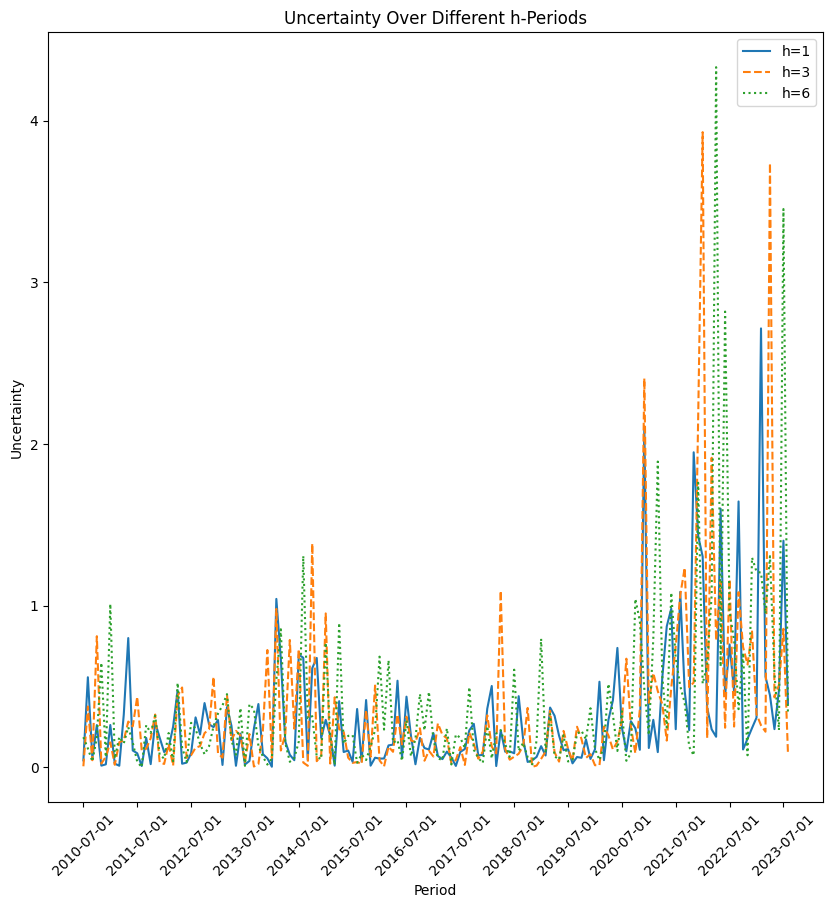

In [416]:
# Plot 'avg_uncertainty'
plt.figure(figsize=(10, 10))
plt.plot(uncertainties_1['Period'], uncertainties_1['uncertainty'], label='h=1', linestyle='-')
plt.plot(uncertainties_3['Period'], uncertainties_3['uncertainty'], label='h=3', linestyle='--')
plt.plot(uncertainties_6['Period'], uncertainties_6['uncertainty'], label='h=6', linestyle=':')


plt.title('Uncertainty Over Different h-Periods')
plt.xlabel('Period')
plt.ylabel('Uncertainty')
plt.legend()

# Set x-axis ticks at intervals of 12 periods and rotate x-labels
plt.xticks(uncertainties_1['Period'][::12], rotation=45)
plt.show()



In [417]:
# Save to csv
uncertainties_1.to_csv('../data/processed/uncertainty_index.csv', index=False, encoding='utf')